!pip install https://github.com/ipython-contrib/jupyter_contrib_nbextensions/tarball/master
!pip install jupyter_nbextensions_configurator
!jupyter contrib nbextension install --user
!jupyter nbextensions_configurator enable --user

In [126]:
!pip install plotly # импортируем для plotly

1.[Импортируемые библиотеки](#1)

2.[Полезные ссылки](#2)

3.[Чтение/запись CSV и EXCEL](#3)

3.[Метод .merge()](#4)

5.[Изменение мультииндекса](#5)

6.[Статистика](#6)

7.[LAMBDA X функции](#7)

8.[Изменение типов данных](#8)

9.[Интересные методы и алгоитмы](#9)

10.[Логическая индексация](#10)



<a id="1"></a>

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px # выше добавили !pip install plotly
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_columns', 500)# размер вывода таблицы
import math
from bs4 import BeautifulSoup
import requests #для запросов get
import re #для регулярных выражений
from datetime import timedelta # работ с датой
import datetime # работ с датой
import seaborn as sns


<a id="2"></a>


*Полезные ссылки:*
- создание DataFrame https://khashtamov.com/ru/pandas-introduction/
- дока Python https://docs.python.org/3/library/functions.html
- дока Pandas https://pandas.pydata.org/pandas-docs/stable/ 
- дока Matplotlib https://matplotlib.org/
- дока Plotly https://plotly.com/python/#fundamentals
- дока Seaborn https://seaborn.pydata.org/tutorial/categorical.html
- ошибки https://docs.python.org/3/library/exceptions.html
- дока NumPy https://numpy.org/doc/stable/reference/
- хороший сайт https://pyprog.pro/
- справочник HTML http://htmlbook.ru/html
- курс по разработке Я.Практикум https://praktikum.yandex.ru/profile/web/
- дока Oracle https://oracleplsql.ru/max-postgresql.html
- Цвета вормате HEX https://www.color-hex.com/
- Палитры https://colorhunt.co/

SQL: `SELECT`-`FROM`-`WHERE`-`GROUP BY`-`HAVING`-`ORDER BY`


`WHERE` - применяется до агрегирующих функций и группировок
`GROUP BY` - применяется после агрегирующих функций и группировок

# Почитать: https://python-scripts.com/matplotlib

#  Хороший материал по МАТЛАБУ https://pyprog.pro/mpl/mpl_main_components.html

https://habr.com/ru/company/wunderfund/blog/316826/ #доп возможности Jupiter

`SyntaxError` — ошибка с синтаксисом программы

`IndentationError` — неверное количество отступов

`NameError` — попытка обратиться к несуществующей переменной

`IndexError` — попытка доступа к несуществующему элементу в словаре или списке


<span style='color:green'>print("Страна {}, место {}.".format(index, value))</span>


<a id="3"></a>


<div class="alert alert-success">

    
# <span style='color:red'>Чтение/запись CSV и EXCEL</span>



Прочитаем **csv** файл, также можно читать **excel** файл, метод `read_excel('tra-ta-ta.xlsx', sheet_name='Sheet3')`,
сохранение в excel или csv форматы: `to_excel('output.xlsx', sheet_name='Sheet_name_1')`
`to_csv('name.csv')`


In [128]:

calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv', index_col=0)#указывем столбец индекса





In [129]:
calls=calls.pivot_table(index='call_date', )

In [130]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id="4"></a>

<div class="alert alert-success">


# <span style='color:red'>Метод .merge()</span>


<div style="border:solid green 10px; padding: 30px">
- выгрузим csv файл - *zoo*

- создадим DataFrame - *zoo_eats*

- файлы имеют разную длину

In [131]:
# Простой способ смержить 2 таблицы
# pd.merge(df_full_query,df_null_query,on='sourceMedium')

# https://pythonru.com/biblioteki/podgotovka-dannyh-v-pandas-pd-10

In [132]:

zoo = pd.read_csv('zoo.csv', sep=',')
zoo_eats = pd.DataFrame([['elephant','vegetables'], ['tiger','meat'], ['kangaroo','vegetables'], ['zebra','vegetables'], ['giraffe','vegetables']], columns=['animal', 'food'])

In [133]:
zoo_eats

,animal,food
0,elephant,vegetables
1,tiger,meat
2,kangaroo,vegetables
3,zebra,vegetables
4,giraffe,vegetables


In [134]:
zoo.columns = ['Animal', 'uniq_id', 'WaTer_need'] # ПРИМЕР для переименования столбцов

In [135]:
zoo.head(2)

,Animal,uniq_id,WaTer_need
0,elephant,1001,500
1,elephant,1002,600


In [136]:
zoo.columns = zoo.columns.str.lower() # ПРИМЕР для приведения всех столбцов к нижнему регистру

In [137]:
zoo

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200
9,zebra,1010,220


In [138]:
zoo_eats

,animal,food
0,elephant,vegetables
1,tiger,meat
2,kangaroo,vegetables
3,zebra,vegetables
4,giraffe,vegetables


In [139]:
# применим .merge()     join() тоже самое, но вместо столбца должен бы индекс
zoo.merge(zoo_eats, how = 'inner')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


Подтянулись все значения `inner`, т.е. связались только столбцы с общими знаечниями. Не попали `lion` и `giraffe`

<img src="https://pythonru.com/wp-content/uploads/2019/09/tipy-sliyaniya-dataframe.png" width="500">

`inner` - общие значения имеющиеся в 2 таблицах (стоит по умолчанию, можно не указывать)

`outer` - все значения 2 таблицах

`left` - все значения из левой таблицы

`right` - все значения из правой таблицы

In [140]:
#Свяжем все столбцы из левой таблицы
#теперь появится еще и lion 

zoo.merge(zoo_eats, how = 'left')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


Иногда pandas не сможет распознать столбцы для связывания автоматически, и тогда **нужно указать названия колонок**. Для этого нужны параметры `left_on` и `right_on`.
Пример:

In [141]:
zoo.merge(zoo_eats, how = 'left', left_on='animal', right_on='animal')

,animal,uniq_id,water_need,food
0,elephant,1001,500,vegetables
1,elephant,1002,600,vegetables
2,elephant,1003,550,vegetables
3,tiger,1004,300,meat
4,tiger,1005,320,meat
5,tiger,1006,330,meat
6,tiger,1007,290,meat
7,tiger,1008,310,meat
8,zebra,1009,200,vegetables
9,zebra,1010,220,vegetables


In [142]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id="5"></a>

<div class="alert alert-success">


# <span style='color:red'>Изменение мультииндекса</span>

In [249]:
df = pd.DataFrame({
     'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
     'population': [17.04, 143.5, 9.5, 45.5],
     'square': [2724902, 17125191, 207600, 603628],
'language':['kz', 'rus', 'belrus', 'ukr'],
'average earnings':[700, 2000, 600, 1000],
'nationality':['kz', 'rus', 'rus', 'rus']})

In [250]:
df

,country,population,square,language,average earnings,nationality
0,Kazakhstan,17.04,2724902,kz,700,kz
1,Russia,143.50,17125191,rus,2000,rus
2,Belarus,9.50,207600,belrus,600,rus
3,Ukraine,45.50,603628,ukr,1000,rus


In [251]:
# здесь мы не используем параметр 'columns=...', но помним, что он есть
df_pv = df.pivot_table(index='country', values=['population', 'language'],\
                       aggfunc = {'population':['sum','count'], 'language':'count'})
df_pv

language population        
              count      count     sum
country                               
Belarus           1          1    9.50
Kazakhstan        1          1   17.04
Russia            1          1  143.50
Ukraine           1          1   45.50

In [146]:
# УБИРАЕМ МУЛЬТИИНДЕКС
df_pv.reset_index(inplace=True)
df_pv

country language population        
                 count      count     sum
0     Belarus        1          1    9.50
1  Kazakhstan        1          1   17.04
2      Russia        1          1  143.50
3     Ukraine        1          1   45.50

In [147]:
# переименуем неудобные назнавния солбцов
df_pv.columns = ['country', 'language count', 'population count', 'population sum']



df_pv.drop(columns = ['language count', 'population count'])



In [148]:
df_pv

,country,language count,population count,population sum
0,Belarus,1,1,9.50
1,Kazakhstan,1,1,17.04
2,Russia,1,1,143.50
3,Ukraine,1,1,45.50


In [149]:
# удалим ненужные столбцы, аналогично df_pv.drop(columns = ['language count', 'population count'])


df_pv.drop(['language count', 'population count'], axis=1) # указав индекс строк и axis=0 мы можем удалять строки
#df.drop(index=[0]) так можно удалить строку по индексу

,country,population sum
0,Belarus,9.50
1,Kazakhstan,17.04
2,Russia,143.50
3,Ukraine,45.50


In [150]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id ="6"></a>

<div class="alert alert-info">

# Статистика



Причины использования т-критерия СтуЪдента потосму-что:
1)Мы анализируем различия между 2 группами данных 
2)Выборка, предоставленная нам операторм достаточно небольшая, поэтому судить по ней о генеральной совокупности нужно с особой осторожностью
3)Данные о выручке относятся к количественным данным
4)Мы исследуем независимые группы данных
5)Исследуемые данные подчиняются закону нормального распределения



`Доверительный интервал(95%)+уровень статистической значимости(5%)=статистика разности (100%)`


Ширину доверительного интервала задает сам исследователь варьирую критерий Т который онпринемает в качестве необходимого, обычно применяется Т=2, который соответсвует ширине доверительного интревала = 95%
95% означает, что с 95% вероятностью вокруг выборочной средней существует определенный доверительный интервал в кототрый и попадает рельно существующая средняя из генеральной совокупности.`

**Закон нормального распределения:
х - величина изучаемого признака
y - частоты встречаемости какого-то признака**






<div class="alert alert-success">



# <span style='color:red'>Прверка подходит ли среднее из выборки ко всей генеральной совокупности (основы статистики):</span>

Ваш партнёр утверждает, что основанный вами сайт стал точкой притяжения пользователей: они проводят на нём `2 часа` каждый день. Из записей о времени на сайте за день взяли выборку в `200 человек`. Возьмём её и проверим гипотезу партнёра.

**Ячейку ниже перевести в формат Сode**

from scipy import stats as st
import numpy as np
import pandas as pd
    
time_at_site = pd.read_csv('user_time.csv') #выгрузка 200 сеансов
    
interested_value = 120 #2 часа
    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_1samp(
    time_at_site, 
    interested_value) #метод st.ttest_1samp(array, mean_value)создает статистику разности для 
#среднней генеральной выборки(основываясь на array) и mean_value 
    
print('p-значение: ', results.pvalue)# метод .pvalue возвращает уровень в статистике разности для 2 заданных значений(А, Б),
#если он больше 10%, то они расположены достаточно близкою т.е. для этих значений уровень статистической значимости можно постаить даже 10%. Нормой считается 5 и 1%

Пример:
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

- коментарии:
Статистика разности — это количество стандартных отклонений между сравниваемыми значениями, если оба распределения привести к стандартному нормальному распределению со средним 0 и стандартным отклонением 1. 

Уровень статистической значимости — это вероятность случайно получить в реальном наблюдении значение, далёкое от предполагаемого в нулевой гипотезе.

In [151]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id="7"></a>

<div class="alert alert-success">


# <span style='color:red'>LAMBDA X функции</span>

**LAMBDA** – это маленькие анонимные функции. 
Общее правило: `lambda x: x+1`

In [152]:
(lambda x: x + 1)(2)

3

In [153]:
sp=pd.Series([1,2,3,4,5,6,7,8,9])# создадим Series(Dtaframe для этого примера)

In [154]:
sp

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [155]:
#применем lambda x к каждой строке Series
for ever in sp:
    j = (lambda x: x+5)(ever)
    print(j)
    
    

6
7
8
9
10
11
12
13
14


**Пример использования lambda функции в сводной таблице**

In [252]:
# выведем таблицу df
df

,country,population,square,language,average earnings,nationality
0,Kazakhstan,17.04,2724902,kz,700,kz
1,Russia,143.50,17125191,rus,2000,rus
2,Belarus,9.50,207600,belrus,600,rus
3,Ukraine,45.50,603628,ukr,1000,rus


In [253]:
plus_earn=100 #добавим всем по 100$ к средей  зарплате 

df.pivot_table(index='country', values=['population', 'average earnings', 'square', 'language', 'nationality'],\
               aggfunc={'population':'sum',\
                        'average earnings': lambda x: x+plus_earn, 'square':'sum', \
                        'language':'first','nationality':'unique'})

,average earnings,language,nationality,population,square
country,,,,,
Belarus,700,belrus,[rus],9.50,207600
Kazakhstan,800,kz,[kz],17.04,2724902
Russia,2100,rus,[rus],143.50,17125191
Ukraine,1100,ukr,[rus],45.50,603628


In [158]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id="8"></a>

<div class="alert alert-success">


# <span style='color:red'>Изменение типов данных</span>

In [159]:
data_games = pd.read_csv('games.csv')
data_games.head(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


В данном случае в столбце `Critic_Score` у нас тип данных `float`, но мы его не можем заменить, так как часть строк из этого столбца имеют `NaN`, то стандартные `astype и to_numeric не работают`. 
Ниже функция для таких ситуаций она меняет формат там где заполнены значения и возвращает 0 там где они НЕзаполнены.

**Вариаации использования этого кода:**

- float-int

- obj-float

In [160]:

def changing_type_critic_score(critic_score):
    if pd.isna(critic_score) != True:
        return int(critic_score)      
    else:
        return 0
data_games['Critic_Score'] = data_games['Critic_Score'].apply(changing_type_critic_score)
data_games.head(2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN


In [161]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id="9"></a>

<div class="alert alert-success">


# <span style='color:red'>Интересные методы и алгоитмы</span>




In [1]:
# переименование столбцов
dfff = dfff.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

NameError: name 'dfff' is not defined

f string

Изменение названия столбцов в цикле

union_tabs.columns =[column.replace("d", "_") for column in union_tabs.columns]

In [162]:
print("-----------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------


- Применяемый ниже прием позволяет проверить количество пропущенных значений во всем датафрэйме относительно столбца `Name`. Это значит, что он ссчитает все пропуски из столбцов параллельно строкам из столбца `Name`. Сам `Name` он не считает. Если количество везде равно, то это значит, что это одни и теже строки. 

In [163]:
data_games[data_games['Name'].isnull()].count() #2 здесь 2 строки имеют пропуски относительно столбца Name

Name               0
Platform           2
Year_of_Release    2
Genre              0
NA_sales           2
EU_sales           2
JP_sales           2
Other_sales        2
Critic_Score       2
User_Score         0
Rating             0
dtype: int64

In [164]:
print("-----------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------


- метод `.sample()` показывает нам случайные строки из датафрэйма

In [165]:
zoo.sample(5) # 5 случайных строк

,animal,uniq_id,water_need
15,lion,1016,420
3,tiger,1004,300
20,kangaroo,1021,430
0,elephant,1001,500
18,lion,1019,390


In [166]:
print("-----------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------


- Простой и удобный способ замены значений через словарь.

In [167]:
zoo.head(15).replace({'zebra':'ZEBRA', 'tiger':'TIGER'}) # поменяем названия zebra и tiger

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600
2,elephant,1003,550
3,TIGER,1004,300
4,TIGER,1005,320
5,TIGER,1006,330
6,TIGER,1007,290
7,TIGER,1008,310
8,ZEBRA,1009,200
9,ZEBRA,1010,220


In [168]:
print("-----------------------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------------------


- метод set_axis() позволяет переименовывать DataFrame

In [169]:
zoo.head(2)# вспомним zoo

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600


In [170]:
new_cols=['animalS', 'uniq_idS', 'water_needS'] # создадим список с новыми названиями

In [171]:
zoo.set_axis(new_cols, axis=1, inplace=True)# применим метод .set_axis()



In [172]:
zoo.head(2)

,animalS,uniq_idS,water_needS
0,elephant,1001,500
1,elephant,1002,600


In [173]:
new_cols=['animal', 'uniq_id', 'water_need']

In [174]:
zoo.set_axis(['animal', 'uniq_id', 'water_need'], axis=1, inplace=True)# вернем назад
zoo.head(2)

,animal,uniq_id,water_need
0,elephant,1001,500
1,elephant,1002,600


`с индексами должно тоже работать, но нужно проверить`

In [175]:
print("-----------------------------------------------------------------------------------------------------------")


-----------------------------------------------------------------------------------------------------------


- сложение 2 словарей

In [176]:
a = {1: "one", 2: "two", 3: "three"}
b = {4: "four", 5: "five"}
a.update(b)
print(a)

{1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five'}


In [ ]:
### Работа с датой и временем (дата и время)

In [ ]:
# Извлечение даты

dataframe.loc[:, 'column'].dt.year или month day minute и т.д

In [177]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<a id="10"></a>

<div class="alert alert-success">
  
    
# Логическая индексация  --------   `.loc[строка, столбец]`
    
    
  

In [178]:
zoo.sample(frac=0.5)# выведем 50% случайныx строк для ознакомления

,animal,uniq_id,water_need
7,tiger,1008,310
14,zebra,1015,80
18,lion,1019,390
11,zebra,1012,230
21,kangaroo,1022,410
2,elephant,1003,550
20,kangaroo,1021,430
8,zebra,1009,200
0,elephant,1001,500
5,tiger,1006,330


In [179]:
zoo.loc[8,'uniq_id']# вывели необходиму ячейку

1009

In [180]:
zoo.loc[:, 'uniq_id'].head(2) # вывели столбец 

0    1001
1    1002
Name: uniq_id, dtype: int64

In [181]:
zoo.loc[8, :]# вывели строку, но уже перевернули

animal        zebra
uniq_id        1009
water_need      200
Name: 8, dtype: object

In [182]:
zoo.loc[2:8, :]# со 2 по 8 строчки все столбцы

,animal,uniq_id,water_need
2,elephant,1003,550
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310
8,zebra,1009,200


- Самое интересое, что с логической индексацией можно осуществлять поис по необходимому условию

In [183]:
zoo[zoo.loc[:,'animal'] == 'tiger'][:] # найдем все строчки где в столбце animal == tiger 

,animal,uniq_id,water_need
3,tiger,1004,300
4,tiger,1005,320
5,tiger,1006,330
6,tiger,1007,290
7,tiger,1008,310


In [184]:
zoo.loc[zoo.loc[:,'animal'] == 'tiger'][['water_need', 'uniq_id']]# вывели параллельные ячейки, ячейкам со значениям tiger

,water_need,uniq_id
3,300,1004
4,320,1005
5,330,1006
6,290,1007
7,310,1008


In [185]:
zoo.loc[zoo['animal'] == 'elephant', 'animal'] = 'ELEPHANT' # заменим значения с помощью логичской индексации

In [186]:
zoo.sample(10)

,animal,uniq_id,water_need
9,zebra,1010,220
5,tiger,1006,330
3,tiger,1004,300
2,ELEPHANT,1003,550
14,zebra,1015,80
6,tiger,1007,290
0,ELEPHANT,1001,500
8,zebra,1009,200
20,kangaroo,1021,430
7,tiger,1008,310


In [187]:
zoo.loc[zoo['animal'] == 'ELEPHANT', 'uniq_id'] = 'ELEPHANT'# так же можно логичской индексацией изменить значения в других столбцах

In [188]:
zoo.sample(5)

,animal,uniq_id,water_need
21,kangaroo,1022,410
17,lion,1018,500
5,tiger,1006,330
20,kangaroo,1021,430
3,tiger,1004,300


In [189]:
# вернем все назад, где это возможно)))
zoo.loc[zoo['animal'] == 'ELEPHANT', 'animal'] = 'elephant' 
zoo.loc[zoo['animal'] == 'elephant', 'uniq_id'] = 2033

In [190]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<div class="alert alert-success">
  
    
# метод.query()

In [191]:
zoo.query('animal == "elephant"')# найдем все строчки со значением elephant в столбце animal. Стоит обратить внимание на двойные кавычки

,animal,uniq_id,water_need
0,elephant,2033,500
1,elephant,2033,600
2,elephant,2033,550


In [192]:
variable_1 = 200+300 # 500
variable_2 = 300 + 300 # 600

zoo.query('water_need == @variable_1 | water_need == @variable_2')# используем переменную в методе query

,animal,uniq_id,water_need
0,elephant,2033,500
1,elephant,2033,600
16,lion,1017,600
17,lion,1018,500


In [193]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<div class="alert alert-success">

# Библиотека NumPy

- NumPy — это библиотека языка Python, добавляющая поддержку больших многомерных массивов и матриц, вместе с большой библиотекой высокоуровневых (и очень быстрых) математических функций для операций с этими массивами.

In [194]:
np.arange(1, 2, 0.01)# здесь 3 аргумента, начало отсчета, конец отсчета, шаг 

array([1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31, 1.32,
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])

In [195]:
np.zeros((3, 5, 2))# создает массив из нулей, в параметрах размеры(столбцы, индекс, списки)

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [196]:
np.ones((2, 2, 2))# создает массив из 1, в параметрах размеры(столбцы, индекс, списки)

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [197]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')


<div class="alert alert-success">

# Библиотека matplotlib

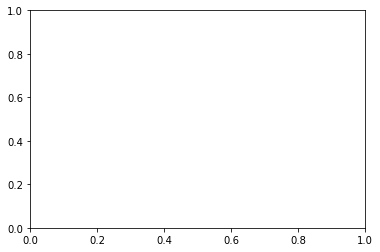

In [198]:
# выполним код 

fig = plt.figure()
ax = fig.add_subplot(111)

plt.show()

- fig-это класс figure(контейнер), в котором создается ax-оси(подконтейнеры).111 - это первая строка, первый столбец и первая (единственная) ячейка на сетке Figure.

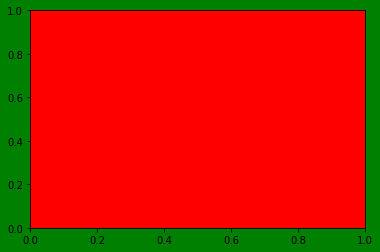

In [199]:
#  выделим цветом fig и ax

fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')
ax.set(facecolor = 'red')

plt.show()








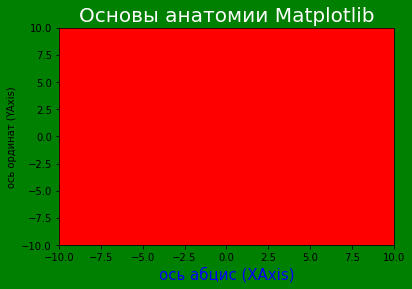

In [200]:
# вот еще варианты задаыаемых параметров, нажать клавищу TAB после ax.set
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set(facecolor = 'green')

ax.set(facecolor = 'red')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_title('Основы анатомии Matplotlib', color = 'white', size=20)
ax.set_xlabel('ось абцис (XAxis)', color = 'blue', size = 15)
ax.set_ylabel('ось ординат (YAxis)')
ax.set_size = 2000

plt.show()


# краткий вариант
# ax.set(facecolor = 'red',
       #xlim = [-10, 10],
       #ylim = [-2, 2],
       #title = 'Основы анатомии matplotlib',
       #xlabel = 'ось абцис (XAxis)',
       #ylabel = 'ось ординат (YAxis)')






- метод plot рисует точки соединенные линиями;
- метод scatter просто рисует точки


`другие методы смотреть в доке`

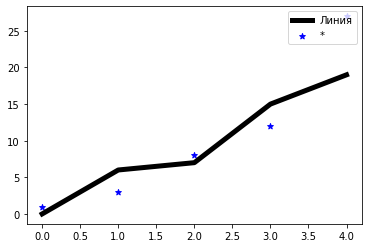

In [201]:
# добавим к методам параметры и расположим на лейбл в правом верхнем углу

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], color = 'black', linewidth = 5, label = 'Линия')
ax.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'blue', marker = '*', label = '*')

plt.legend(loc='upper right')# lower left
plt.show()

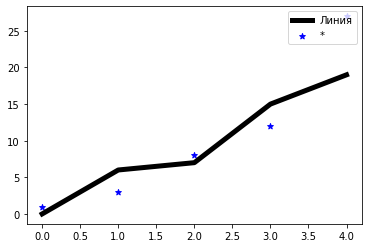

In [202]:
# тоже самое, но без fig = plt.figure()     ax = fig.add_subplot(111)
# если график 1, можно это не прописывать

plt.plot([0, 1, 2, 3, 4], [0, 6, 7, 15, 19], color = 'black', linewidth = 5, label = 'Линия')
plt.scatter([0, 1, 2, 3, 4], [1, 3, 8, 12, 27], color = 'blue', marker = '*', label = '*')

plt.legend(loc='upper right')# lower left
plt.show()

# Несколькоо осе ax в одном контейнере fig

`ax = add_subplot(1, 1, 1)`
- первое - количество строк;
- второе - количество столбцов;
- третье - индекс ячейки.

Индексирование полученных ячеек начинается с левого верхнего угла, выполняется построчно слева-направо и заканчивается в правом нижнем углу:

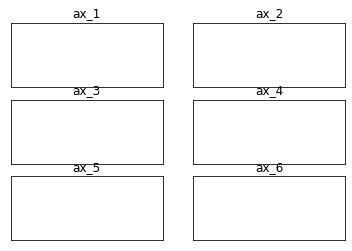

In [203]:
# e у каждого ax свое расположение

fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 2)
ax_3 = fig.add_subplot(3, 2, 3)
ax_4 = fig.add_subplot(3, 2, 4)
ax_5 = fig.add_subplot(3, 2, 5)
ax_6 = fig.add_subplot(3, 2, 6)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

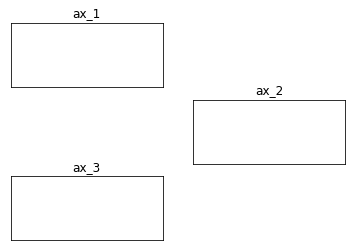

In [204]:
# вариант расположения


fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 2, 5)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

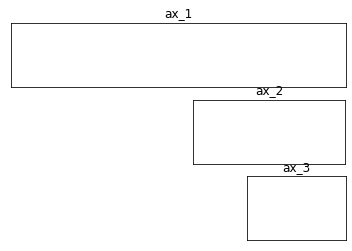

In [205]:
# или так...

fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(3, 2, 4)
ax_3 = fig.add_subplot(3, 3, 9)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])

plt.show()

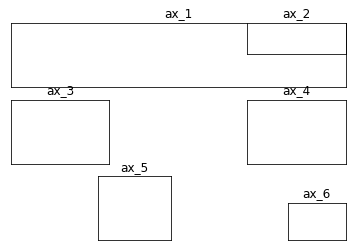

In [206]:
# и даже так


fig = plt.figure()

ax_1 = fig.add_subplot(3, 1, 1)
ax_2 = fig.add_subplot(6, 3, 3)
ax_3 = fig.add_subplot(3, 3, 4)
ax_4 = fig.add_subplot(3, 3, 6)
ax_5 = fig.add_subplot(3, 4, 10)
ax_6 = fig.add_subplot(5, 5, 25)

ax_1.set(title = 'ax_1', xticks=[], yticks=[])
ax_2.set(title = 'ax_2', xticks=[], yticks=[])
ax_3.set(title = 'ax_3', xticks=[], yticks=[])
ax_4.set(title = 'ax_4', xticks=[], yticks=[])
ax_5.set(title = 'ax_5', xticks=[], yticks=[])
ax_6.set(title = 'ax_6', xticks=[], yticks=[])

plt.show()

- дальше применения цикла для ax

а вот и ссылочка для обьяснения https://pyprog.pro/mpl/mpl_main_components.html

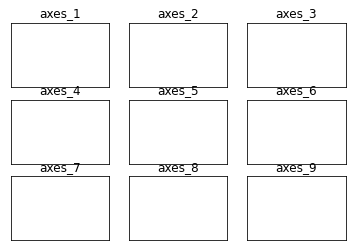

In [207]:
fig, axes = plt.subplots(nrows=3, ncols=3)

n = 1

for ax in axes.flat:
    ax.set(title='axes_' + str(n), xticks=[], yticks=[])
    n += 1
plt.show()

In [208]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')



<div class="alert alert-success">

# Парсинг # 









В начале мы прописали `from bs4 import BeautifulSoup` и `import requests`
теперь приступим

#настройки для парсинга sitemap
URL_sitemap='https://www.leomax.ru/sitemap.xml'

req_sm = requests.get(URL_sitemap)#прописываем get-запрос к нашему урлу sitemap
soup_sm = BeautifulSoup(req_sm.text, 'lxml')# 1 аргумент: get-запрос к урлу, 2 аргумент: парсер






soup_sm# Получили html документ

далее мы создадим пустой список и в него добавим все названия. Важно помнить, что метод text применяется только к строке, соотвтественно мы сможем оставить только текст ТОЛЬКО через цикл

# достанем все урлы из сайтмэпа
list_sitemap=[]
for row in soup_sm.find_all('loc'):#, {'class':'folder'}):
    #print(row)
    list_sitemap.append(row.text)
      

list_sitemap

<div class="alert alert-success">

Регулярные выражения

# Пример
string = "«Генерал Слокам» 15 июня 1904 года Ист-Ривер Человеческий фактор"
print(re.search('\w+', string))# метод search указывает диапазон индексов, подходящих под шаблон
print(re.search('\w+', string).group()) # такой вариант покажет нам только текс, без сведений о диапазоне



df_sitemap = pd.DataFrame(list_sitemap, columns = ['url'])# отдатафрэймили df_sitemap
sample = df_sitemap[35:36]

sample_words = df_sitemap[34:36]



sample_words

df_sitemap.head(5)


urls=[]# создаем пустой список
for one in df_sitemap.url: # цикл для df_sitemap
    urls_string = re.search('https://www.leomax.ru/catalog/[A-z-]+', one) # регулярка для поиска а каждой строке текста 
    urls.append(urls_string)
print(urls)
    
    #print(one)
    #one_str = one.to_string()
    #print(re.search('https://www.leomax.ru/catalog/[A-z]+', one_str).group())

    


        
#'«[А-я ]+»'

urlsData = pd.DataFrame(urls)# отдатафрэймили urlsData
urlsData = urlsData.dropna() # дропнем пустоты

urlsData.head(5)
   
        
          

urlsData=pd.DataFrame(urlsData)  
k = urlsData.head(1).to_string()
k


kk = k[136:]
j = pd.Series(kk)

kk

df_sitemap.url

list_sitemap_sample = ['https://www.leomax.ru/catalog/aerogrili-shashlychnicy/']

# тестим парсер для 1 страницы

URL_test='https://www.leomax.ru/catalog/detskie-tovary/'

req_test = requests.get(URL_test)#прописываем get-запрос к нашему урлу sitemap
soup_test = BeautifulSoup(req_test.text, 'lxml')



list_for_test=[] 
for row in soup_test.find_all('div', {'class':'product-item__title'}):
    #print(row)
    list_for_test.append(row.text)
    
 #('div', attrs = {'class':'t754__price-value js-product-price'})   

list_for_test

парсер для списка урлов


`Возникла проблема`: необходимо отделить каталожные урлы от урлов карточек товаров и других урлов урлов   



# парсер для всписка урлов возможно через функцию(?)

URL_test_sample=['https://www.leomax.ru',
 'https://www.leomax.ru/catalog/',
 'https://www.leomax.ru/catalog/aerogrili-shashlychnicy/',
 'https://www.leomax.ru/catalog/aksessuari-dlja-vipechki/',
 'https://www.leomax.ru/catalog/aksessuary/',
 'https://www.leomax.ru/catalog/aksessuary-dlja-dachi/',
 'https://www.leomax.ru/catalog/aksessuary-dlja-kuhni/',
 'https://www.leomax.ru/catalog/aksessuary-dlja-vannyh-komnat/',
 'https://www.leomax.ru/catalog/aksessuary-dlya-obuvi/',
 'https://www.leomax.ru/catalog/antenny/',
 'https://www.leomax.ru/catalog/antitsellyulitnye-massazhery/',
 'https://www.leomax.ru/catalog/avto-hobbi-i-aksessuary/',
 'https://www.leomax.ru/catalog/bady/',
 'https://www.leomax.ru/catalog/baletki/',
 'https://www.leomax.ru/catalog/bele/',
 'https://www.leomax.ru/catalog/belie/',
 'https://www.leomax.ru/catalog/bizhuterija/',
 'https://www.leomax.ru/catalog/bluzy-i-tuniki/',
 'https://www.leomax.ru/catalog/bosonozhki/',
 'https://www.leomax.ru/catalog/botforty/',
 'https://www.leomax.ru/catalog/botiljoni/',
 'https://www.leomax.ru/catalog/botinki/',
 'https://www.leomax.ru/catalog/braslety/',
 'https://www.leomax.ru/catalog/braslety925/',
 'https://www.leomax.ru/catalog/brelki/',
 'https://www.leomax.ru/catalog/brjuki-i-dzhinsy/',
 'https://www.leomax.ru/catalog/broshi-i-bulavki/',
 'https://www.leomax.ru/catalog/broshi-i-bulavki925/',
 'https://www.leomax.ru/catalog/bruki-jeans/',
 'https://www.leomax.ru/catalog/bruki-men/'
 ]


URL_test_sample_little = [
    'https://www.leomax.ru',
    'https://www.leomax.ru/catalog/',
 'https://www.leomax.ru/catalog/aerogrili-shashlychnicy/'
 
 
                         ]


list_for_test_sample = []#обьявим список обязательно перед циклами
list_for_test_sample_3 = []
for one in URL_test_sample_little:#цикл для get запроса и применения библиотеки bs4
    
    
    
    
    req_test_sample = requests.get(one) # достаем html 
    
    soup_test_sample = BeautifulSoup(req_test_sample.text, 'lxml') #достаем текст из html
    print(one)# добавил список урлов, чтоб знать какие рулы парсим
    
   
    for row in soup_test_sample.find_all('div', {'class':'product-item__title'}): # цикл для примения метода find_all 
        
        list_for_test_sample.append(row.text)# аппендим список
        
        
    for row in soup_test_sample.find_all('div', {'class':'product-item__price-current'}):# пишем 2 цикл для парсинга цен
        list_for_test_sample_3.append(row.text)# тоже аппендинм список
        
print(list_for_test_sample)
print(list_for_test_sample_3)


       
       
 
    









list_for_test_sample_1 = pd.DataFrame(list_for_test_sample)# загоняем в DataFrame
#list_for_test_sample_2 = pd.DataFrame(list_for_test_sample_2)
list_for_test_sample_3 = pd.DataFrame(list_for_test_sample_3)# тоже DataFrame-им
union_tab = pd.DataFrame(list_for_test_sample_1)

union_tab['price'] = list_for_test_sample_3
union_tab.columns = ['name', 'price']

#union_tab.name.value_counts()

union_tab# класс)

union_tab.pivot_table(index = 'name', values = 'price', aggfunc=)

<div class="alert alert-success">


# Работа с датой

In [209]:
calls = calls.reset_index()


In [210]:
calls.head()
# в этой таблице нет столбца с формато дат

,call_date,duration,user_id
0,2018-01-01,10.818000,1401.000000
1,2018-01-02,8.784444,1262.555556
2,2018-01-03,4.812857,1316.428571
3,2018-01-04,6.292174,1236.260870
4,2018-01-05,5.323500,1326.150000


In [211]:
# переведем столбец call_date в формат даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d') # параметр format необязателен. 
# возможно так format = '%Y-%m-%d %H:%M:%S'



In [212]:
# достанем разные форматы дат из текущей даты
calls['date'] = calls['call_date'].dt.date # достать дату в формате '%Y-%m-%d', актуально если формат %Y-%m-%d %H:%M:%S'
calls['day_number'] = calls['call_date'].dt.day # номер дня месяца
calls['month'] = calls['call_date'].dt.month # достать месяц
calls['year'] = calls['call_date'].dt.year # достать год
calls['week_number'] = calls['call_date'].dt.week # номер недели
calls['day_of_week'] = calls['call_date'].dt.day_name() # название дня недели
calls['month_name'] = calls['call_date'].dt.month_name() # название месяца
calls.head()



,call_date,duration,user_id,date,day_number,month,year,week_number,day_of_week,month_name
0,2018-01-01,10.818000,1401.000000,2018-01-01,1,1,2018,1,Monday,January
1,2018-01-02,8.784444,1262.555556,2018-01-02,2,1,2018,1,Tuesday,January
2,2018-01-03,4.812857,1316.428571,2018-01-03,3,1,2018,1,Wednesday,January
3,2018-01-04,6.292174,1236.260870,2018-01-04,4,1,2018,1,Thursday,January
4,2018-01-05,5.323500,1326.150000,2018-01-05,5,1,2018,1,Friday,January


In [213]:
# вычетаем необходимое количество 
calls['date-1'] = calls['date']-timedelta(1) # вычиаем 1 день 
calls.head()

,call_date,duration,user_id,date,day_number,month,year,week_number,day_of_week,month_name,date-1
0,2018-01-01,10.818000,1401.000000,2018-01-01,1,1,2018,1,Monday,January,2017-12-31
1,2018-01-02,8.784444,1262.555556,2018-01-02,2,1,2018,1,Tuesday,January,2018-01-01
2,2018-01-03,4.812857,1316.428571,2018-01-03,3,1,2018,1,Wednesday,January,2018-01-02
3,2018-01-04,6.292174,1236.260870,2018-01-04,4,1,2018,1,Thursday,January,2018-01-03
4,2018-01-05,5.323500,1326.150000,2018-01-05,5,1,2018,1,Friday,January,2018-01-04


In [214]:
now_date = datetime.date.today()# достали текущую дату и время
now_date

datetime.date(2021, 12, 2)

In [215]:
now_date = pd.to_datetime(now_date)# переведи в datetime
now_date

Timestamp('2021-12-02 00:00:00')

In [216]:
days_ago_3 = now_date - timedelta(3)# создали переменную, она будет всегда отсчитывать 3 дня от текущей даты
days_ago_3 

Timestamp('2021-11-29 00:00:00')

In [217]:
now_date = now_date.strftime("%Y-%m-%d")# перевели в красивый формат str
now_date

'2021-12-02'

<div class="alert alert-success">

# Когортный анализа

In [218]:
costs = pd.read_csv('costs.csv')
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [219]:
visits = pd.read_csv('visits_log.csv')
visits.columns=['divice', 'end ts', 'source id', 'start ts', 'uid']
visits['month_start']=visits['start ts'].astype('datetime64[M]')# достаем месяц начала сессии
visits


,divice,end ts,source id,start ts,uid,month_start
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-01
...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-01


Первая покупка у пользователя это минимальная дата заказа

In [220]:
orders = pd.read_csv('orders_log.csv')
orders.columns=['buy ts', 'revenue', 'uid']
#orders['month'] = orders['buy ts'].astype('datetime64[M]')
orders



,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [221]:
first_order_date_by_customers = orders.groupby('uid')['buy ts'].min()
first_order_date_by_customers=pd.DataFrame(first_order_date_by_customers)
first_order_date_by_customers = first_order_date_by_customers.reset_index()
first_order_date_by_customers.columns=['uid', 'firts_buy']
first_order_date_by_customers# дата первой покупки
first_order_date_by_customers['first_buy_month'] = first_order_date_by_customers['firts_buy'].astype('datetime64[M]')
first_order_date_by_customers# добавлен столбец первого месяца покупки

,uid,firts_buy,first_buy_month
0,313578113262317,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01
...,...,...,...
36518,18445147675727495770,2017-11-24 09:03:00,2017-11-01
36519,18445407535914413204,2017-09-22 23:55:00,2017-09-01
36520,18445601152732270159,2018-03-26 22:54:00,2018-03-01
36521,18446156210226471712,2018-02-18 19:34:00,2018-02-01


In [222]:
orders = orders.merge(first_order_date_by_customers, on='uid')
orders# смержили таблицу с заказами с таблицей первого заказа



,buy ts,revenue,uid,firts_buy,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01


In [223]:
cohorts=orders.groupby('first_buy_month').agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
cohorts # сгруппировали таблицу заказов по первому заказу, где уникальный номер заказа и id пользователя и суммируем доход

# получилась таблица по уникальным пользователям по первому заказу кгорты месяца

,first_buy_month,uid,revenue
0,2017-06-01,2023,24031.69
1,2017-07-01,1923,16127.92
2,2017-08-01,1370,11606.26
3,2017-09-01,2581,34676.32
4,2017-10-01,4340,27603.45
5,2017-11-01,4081,26098.99
6,2017-12-01,4383,33485.74
7,2018-01-01,3373,16663.13
8,2018-02-01,3651,16750.50
9,2018-03-01,3533,19273.41


In [224]:
orders['buy_month'] = orders['buy ts'].astype('datetime64[M]')
orders# для разбивки предыдущей таблицы по месяцам (в столбцах) добавляем столбец месяца покупки 

,buy ts,revenue,uid,firts_buy,first_buy_month,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-01,2018-05-01


**Когортный анализ по уникальным пользователям за год**

In [225]:
orders.pivot_table(index='first_buy_month',
                   columns='buy_month', 
                  values ='uid',
                  aggfunc = 'nunique')
# теперь пивотим, по сути разбиваем по столбцам(месяцам) первый месяц покупки и уникальных пользователей

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_buy_month,,,,,,,,,,,,,
2017-06-01,2023.0,61.0,50.0,54.0,88.0,67.0,62.0,47.0,58.0,45.0,45.0,53.0,NaN
2017-07-01,NaN,1923.0,52.0,57.0,64.0,49.0,38.0,36.0,39.0,42.0,22.0,26.0,NaN
2017-08-01,NaN,NaN,1370.0,58.0,53.0,44.0,40.0,32.0,30.0,44.0,19.0,31.0,NaN
2017-09-01,NaN,NaN,NaN,2581.0,130.0,100.0,74.0,52.0,64.0,66.0,37.0,43.0,NaN
2017-10-01,NaN,NaN,NaN,NaN,4340.0,206.0,123.0,92.0,93.0,72.0,56.0,67.0,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,4081.0,222.0,120.0,106.0,81.0,48.0,62.0,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4383.0,146.0,103.0,97.0,50.0,63.0,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3373.0,114.0,83.0,43.0,45.0,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3651.0,118.0,58.0,39.0,NaN


In [226]:
orders.pivot_table(index='first_buy_month', 
                  columns='buy_month',
                  values='revenue',
                  aggfunc='sum')

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_buy_month,,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62,NaN
2017-07-01,NaN,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08-01,NaN,NaN,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN
2017-09-01,NaN,NaN,NaN,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN
2017-10-01,NaN,NaN,NaN,NaN,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,20767.49,1141.22,4054.70,4669.10,1371.57,1481.66,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13949.50,994.22,1026.34,481.59,211.48,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15177.16,1015.98,286.66,270.70,NaN


In [227]:
grouped_cohorts = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue':'sum', 'uid':'nunique'})
grouped_cohorts #создадим таблицу с группированную по первому месяцу покупки и по дням покупки по юникам и сумме их заказов

revenue   uid
first_buy_month buy_month                 
2017-06-01      2017-06-01   9557.49  2023
                2017-07-01    981.82    61
                2017-08-01    885.34    50
                2017-09-01   1931.30    54
                2017-10-01   2068.58    88
...                              ...   ...
2018-03-01      2018-05-01   1114.87    58
2018-04-01      2018-04-01  10600.69  2276
                2018-05-01   1209.92    69
2018-05-01      2018-05-01  13925.76  2988
2018-06-01      2018-06-01      3.42     1

[79 rows x 2 columns]

In [228]:
grouped_cohorts['revenue_per_user'] = grouped_cohorts['revenue']/grouped_cohorts['uid']
grouped_cohorts = grouped_cohorts.reset_index()#узнаем средний доход на одного пользователя

In [229]:
grouped_cohorts

,first_buy_month,buy_month,revenue,uid,revenue_per_user
0,2017-06-01,2017-06-01,9557.49,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410
2,2017-06-01,2017-08-01,885.34,50,17.706800
3,2017-06-01,2017-09-01,1931.30,54,35.764815
4,2017-06-01,2017-10-01,2068.58,88,23.506591
...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897
75,2018-04-01,2018-04-01,10600.69,2276,4.657597
76,2018-04-01,2018-05-01,1209.92,69,17.535072
77,2018-05-01,2018-05-01,13925.76,2988,4.660562


**Когортный анализ по среднему чеку за год**


индексы-месяц первой покупки, столбцы-месяцы покупки и считаем среднее значение по дохода пользователю 

In [230]:
grouped_cohorts.pivot_table(index='first_buy_month', columns='buy_month', values='revenue_per_user', aggfunc='mean')

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_buy_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [231]:
grouped_cohorts['lifetime'] = grouped_cohorts['buy_month'] - grouped_cohorts['first_buy_month']
grouped_cohorts

,first_buy_month,buy_month,revenue,uid,revenue_per_user,lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0 days
1,2017-06-01,2017-07-01,981.82,61,16.095410,30 days
2,2017-06-01,2017-08-01,885.34,50,17.706800,61 days
3,2017-06-01,2017-09-01,1931.30,54,35.764815,92 days
4,2017-06-01,2017-10-01,2068.58,88,23.506591,122 days
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897,61 days
75,2018-04-01,2018-04-01,10600.69,2276,4.657597,0 days
76,2018-04-01,2018-05-01,1209.92,69,17.535072,30 days
77,2018-05-01,2018-05-01,13925.76,2988,4.660562,0 days


**lifetime** = время жизни  время от первой покупки и слеледующей покупки (потом мы сгруппируем и в каком-то месяце может быть 0, но в следующем уже больше)

In [232]:
grouped_cohorts['lifetime'] = grouped_cohorts['lifetime'] / np.timedelta64(1, 'M')# приведем к формату месяца 
grouped_cohorts['lifetime']=grouped_cohorts['lifetime'].round().astype('int')# округлим и поменяем формат
grouped_cohorts# получили столбец lifetime

,first_buy_month,buy_month,revenue,uid,revenue_per_user,lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,4
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,58,19.221897,2
75,2018-04-01,2018-04-01,10600.69,2276,4.657597,0
76,2018-04-01,2018-05-01,1209.92,69,17.535072,1
77,2018-05-01,2018-05-01,13925.76,2988,4.660562,0


In [233]:

grouped_cohorts['first_buy_month'] = grouped_cohorts['first_buy_month'].dt.strftime('%Y-%m')
#изменим формат на более удобный


**Когортный анализ для lifetime**

In [234]:
grouped_cohorts_pivot=grouped_cohorts.pivot_table(index = 'first_buy_month', columns='lifetime', values='revenue_per_user', aggfunc='mean')
grouped_cohorts_pivot# в столбы добавили lifetime и получили разбивку по времени жизни

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Визуализируем когортный анализ**

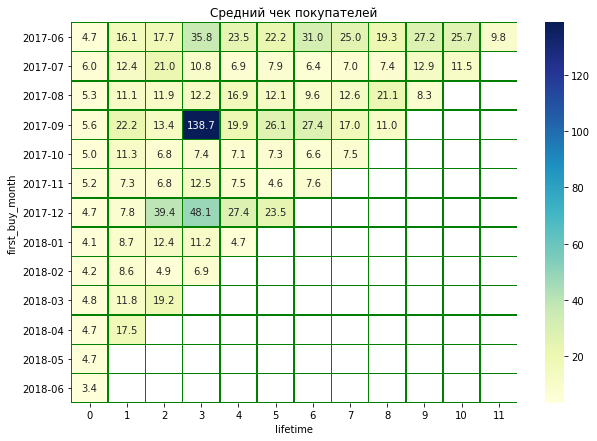

In [235]:
plt.figure(figsize=(10, 7))
plt.title('Средний чек покупателей')
sns.heatmap(grouped_cohorts_pivot, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, linecolor='green')
plt.show()

In [236]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<div class="alert alert-success">

# Retantion rate 
##### (коэффициент возврата пользователей)

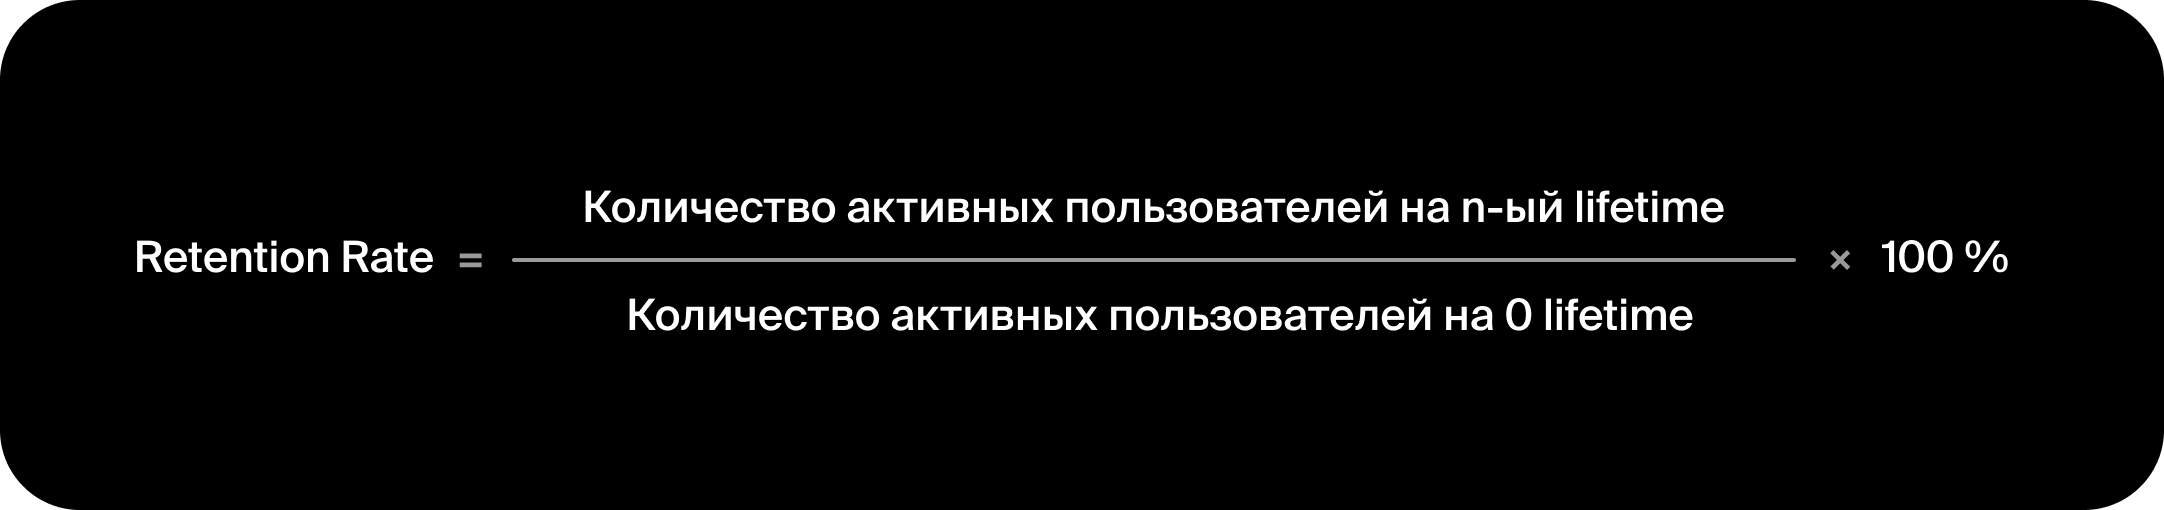

ссылка в Практикуме https://practicum.yandex.ru/trainer/data-analyst/lesson/2ce76492-1d48-4f56-b85c-61b66f5c14ed/task/6d2be65b-cad2-4193-a4b0-ef068c42b42a/

In [78]:
# Выгружаем файл и приводим к формату даты
user_activity = pd.read_csv('/Users/dmitryd/Desktop/Important/Python/Help/user_activity.csv')
user_activity['activity_date'] = pd.to_datetime(user_activity['activity_date'])

# находим первую дату активности 
first_activity_date = user_activity.groupby(['user_id'])['activity_date'].min() 
first_activity_date.name = 'first_activity_date'
# джойним начальную таблицу со значениями певой активности по столбцу user_id
user_activity = user_activity.join(first_activity_date,on='user_id') 

# дата активности - номер дня недели(от даты активности) = дата начала недели
user_activity['activity_week'] = pd.to_datetime(user_activity['activity_date'], unit='d') - pd.to_timedelta(user_activity['activity_date'].dt.dayofweek, unit='d')
    
    
# дата первой активности - номер дня недели(от даты первой активности) = дата начала первой недели
user_activity['first_activity_week'] = pd.to_datetime(user_activity['first_activity_date'], unit='d') - pd.to_timedelta(user_activity['first_activity_date'].dt.dayofweek, unit='d')


# узнаем количество дней между активной неделей и первой активной неделей 


# активная неделя - первая активная неделя  = время жизни когорты/lifetime когорты
user_activity['cohort_lifetime'] = (user_activity['activity_week'] - user_activity['first_activity_week'])

# переводим lifetime пользователя в рамках когорты (в целые числа) с помощью np.timedelta64(1, 'W')
# тут про nympy https://numpy.org/doc/stable/reference/arrays.datetime.html
user_activity['cohort_lifetime'] = user_activity[
    'cohort_lifetime'
] / np.timedelta64(1, 'W')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(
    'int'
) 



# группируем по певой активной недели и по номеру дня недели
cohorts = user_activity.groupby(['first_activity_week', 'cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

# получить столбцы 'first_activity_week', 'user_id' там где cohort_lifetime == 0
# т.о получам количество пользователей в 0 неделю когорты
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week', 'user_id']]

# переименовываем
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

# мерджим 2 таблицы и получаем общее количество пользователей в каждой когорте
cohorts = cohorts.merge(initial_users_count,on='first_activity_week') 




# Retantion Rate = начальное кол-во пользователей / кол-во пользователей на n-месяц
cohorts['retention'] = (cohorts['user_id']/cohorts['cohort_users'])


# посмотрим на cohorts
cohorts.head(3)



,first_activity_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-04-29,0,22573,22573,1.000000
1,2019-04-29,1,15789,22573,0.699464
2,2019-04-29,2,11501,22573,0.509503


In [76]:

# построим сводную: строчки начало когорт, столбцы - день в когорте, 
# значения - сумма retention на определенную дату (сумма = единственному значению в 1 дату)
retention_pivot = cohorts.pivot_table(
    index='first_activity_week',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 


retention_pivot

cohort_lifetime,0,1,2,3,4,5
first_activity_week,,,,,,
2019-04-29,1.0,0.699464,0.509503,0.415319,0.304390,0.019049
2019-05-06,1.0,0.602723,0.455623,0.368385,0.176578,0.006820
2019-05-13,1.0,0.589421,0.432780,0.318247,0.160472,0.006779
2019-05-20,1.0,0.559511,0.398158,0.307571,0.155817,0.006727
2019-05-27,1.0,0.488153,0.370075,0.283479,0.121395,NaN
2019-06-03,1.0,0.350389,0.274205,0.114205,NaN,NaN
2019-06-10,1.0,0.243376,0.112793,NaN,NaN,NaN
2019-06-17,1.0,0.129735,NaN,NaN,NaN,NaN
2019-06-24,1.0,NaN,NaN,NaN,NaN,NaN


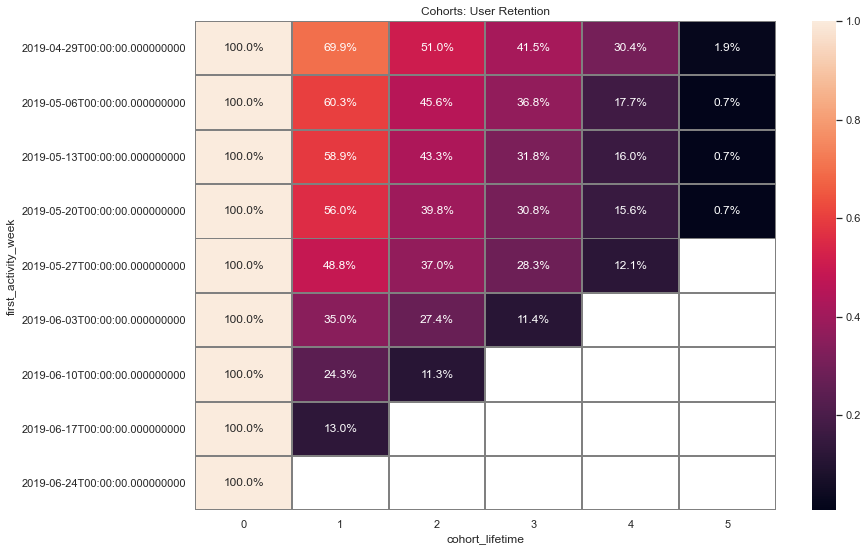

In [77]:
# наведем красоту

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray'); 
 



In [74]:
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')
print('==============================================================================================')

<div class="alert alert-success">

# Библиотека Plotly

In [237]:
data=px.data.election()# импортируем встроенный в библиотеке датафрейм
data.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [238]:
fig = px.bar(data, x='district', y='Joly', title='Результаты Joly по районам', color='result')# гистограмма
fig.update_xaxes(tickangle=45)# повернули названия штатов
fig.show()

<div class = 'alert alert-success'>

# Воронка через plotly

In [239]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = ["Посетителей","Добавили товар в корзину", "Начали оформлять заказ", "Оплатили"],
    x = [583, 258,  120, 56]
    ))
fig.show()

<div class = 'alert alert-success'>
    
    
# Извлечение результата цикла // разбивка столбца на части

In [240]:
df = pd.DataFrame({"order_id":[1,3,7],"order_date":["20/5/2018","22/5/2018","23/5/2018"], "package":["p1,p2,p3","p4","p5,p6"],"package_code":["#111,#222,#333","#444","#555,#666"]})

In [241]:
df

,order_id,order_date,package,package_code
0,1,20/5/2018,"p1,p2,p3","#111,#222,#333"
1,3,22/5/2018,p4,#444
2,7,23/5/2018,"p5,p6","#555,#666"


In [242]:
one =[] # создали пустой список
for string in df['order_date']: # пишем цикл, где сплитуем каждую сторочку 'order_date' по '/' и добавляем в список one
    sp = string.split('/')
    one.append(sp) # теперь one - это список со списками [['20', '5', '2018'], ['22', '5', '2018'], ['23', '5', '2018']]
       
two=pd.Series(one) # приведем two в формат Series 
df['two'] = two # столбец two сейчас в формате списка [20, 5, 2018]
list_2 = [] # создали пустой список

for string in df['two']: # цикл для перевода списка в формат string
    four = ' '.join(string)
    list_2.append(four) # аппендим в пустой список стринговый формат 
seven = pd.Series(list_2) # переводим в Series
df.two=seven # получаем столбец в формате String 

df['five'] = df['two'].str.split(' ').str.get(0) # сплитуем(разбиваем по столбцам) столбец 'two' и извлекаем с помощью.get() и логической индексацией
df['six']=df['two'].str.split(' ').str.get(1)
df['seven']=df['two'].str.split(' ').str.get(2)
df # получили разбитый по символам столбец 'order_date'

,order_id,order_date,package,package_code,two,five,six,seven
0,1,20/5/2018,"p1,p2,p3","#111,#222,#333",20 5 2018,20,5,2018
1,3,22/5/2018,p4,#444,22 5 2018,22,5,2018
2,7,23/5/2018,"p5,p6","#555,#666",23 5 2018,23,5,2018


In [243]:
df

,order_id,order_date,package,package_code,two,five,six,seven
0,1,20/5/2018,"p1,p2,p3","#111,#222,#333",20 5 2018,20,5,2018
1,3,22/5/2018,p4,#444,22 5 2018,22,5,2018
2,7,23/5/2018,"p5,p6","#555,#666",23 5 2018,23,5,2018


# Аналогичная задача реализованная lambda функцией

In [244]:
df_l = pd.DataFrame({"order_id":[1,3,7],"order_date":["20/5/2018","22/5/2018","23/5/2018"], "package":["p1,p2,p3","p4","p5,p6"],"package_code":["#111,#222,#333","#444","#555,#666"]})
df_l

,order_id,order_date,package,package_code
0,1,20/5/2018,"p1,p2,p3","#111,#222,#333"
1,3,22/5/2018,p4,#444
2,7,23/5/2018,"p5,p6","#555,#666"


In [245]:
df_l['new_col']=df_l['order_date'].apply(lambda x: x.split('/')[1])
df_l

,order_id,order_date,package,package_code,new_col
0,1,20/5/2018,"p1,p2,p3","#111,#222,#333",5
1,3,22/5/2018,p4,#444,5
2,7,23/5/2018,"p5,p6","#555,#666",5


# ~merge, join, columns, способы замен (через логическую индексацию, или replace(), может еще...), срезы(query, логическая индексация, plotly~, matplotlib-круговые диаграммы, seabor, парсинг, регулярные выражения, SQL, try exept, работа с датой

In [246]:
# matplotlib https://devpractice.ru/matplotlib-lesson-4-3-bar-pie/

(-1.1086825435770078,
 1.100413454456048,
 -1.1028333654412865,
 1.1094102935425594)

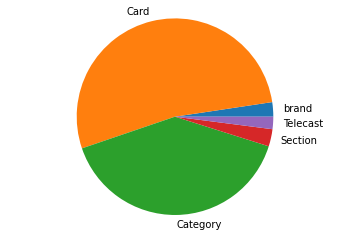

In [247]:
import matplotlib.pyplot as plt
vals = [23409, 520917, 393278, 27964, 20063]
labels = ["brand", "Card", "Category", "Section", "Telecast"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

(-1.3114411164008175,
 2.1462952507215007,
 -1.1154244886384783,
 1.117991547189603)

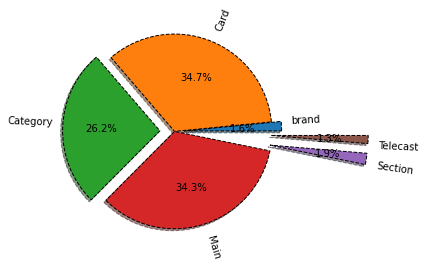

In [248]:
vals = [23409, 520917, 393278, 513759, 27964, 20063]
labels = ["brand", "Card", "Category", "Main", "Section", "Telecast"]
explode = (0.1, 0, 0.15, 0, 0.99, 0.99)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")
